1. Logistic Regression on the Iris Dataset (Classifying Species)        
Concepts Covered: Logistic Regression, Sigmoid Function, Multi-class Classification

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]


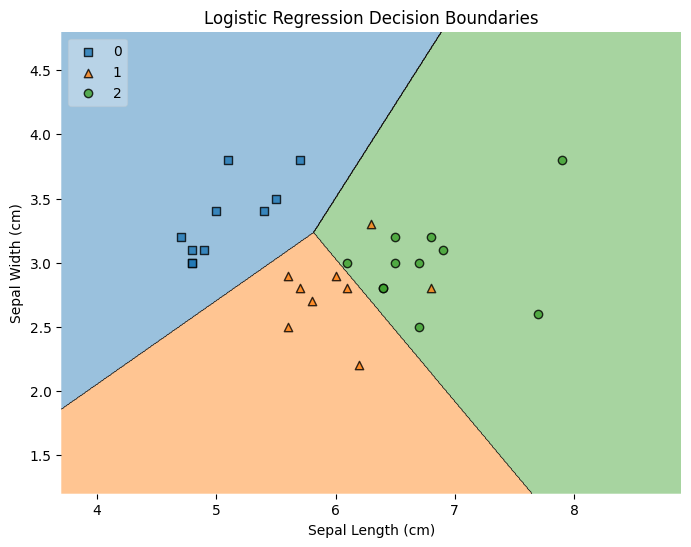

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features (sepal length & sepal width)
y = iris.target  # Labels (0, 1, 2 for different species)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200, multi_class='ovr')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot decision boundaries
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, clf=model, legend=2)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Logistic Regression Decision Boundaries")
plt.show()


2. Predicting Diabetes using Logistic Regression (Binary Classification)      
Concepts Covered: Binary Classification, Sigmoid Function, Probability Threshold

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
df = pd.read_csv(url, names=columns)

# Split features and labels
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7532467532467533
Confusion Matrix:
 [[79 20]
 [18 37]]


3. Sentiment Analysis on Movie Reviews (Positive/Negative Classification)     
Concepts Covered: Text Classification, Bag-of-Words, Logistic Regression

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Sample dataset
reviews = [
    "This movie was fantastic! I loved it.",
    "Terrible acting and horrible plot.",
    "I enjoyed every moment of the film.",
    "The worst movie I have ever seen!",
    "It was an average film, nothing special."
]
labels = [1, 0, 1, 0, 0]  # 1: Positive, 0: Negative

# Convert text to numerical vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Test on a new review
new_review = ["Absolutely loved it, best movie ever!"]
new_review_vector = vectorizer.transform(new_review)
print("Prediction (1=Positive, 0=Negative):", model.predict(new_review_vector)[0])


Accuracy: 0.0
Prediction (1=Positive, 0=Negative): 1


4. Predicting if a Student will Pass based on Study Hours (Sigmoid Function Visualization)          
Concepts Covered: Sigmoid Function, Decision Boundary, Logistic Regression

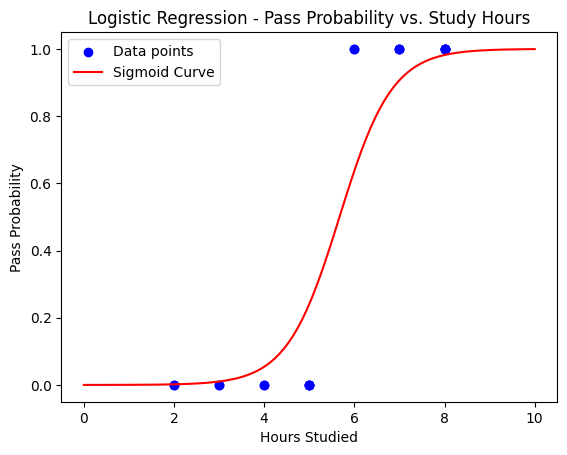

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
np.random.seed(42)
hours_studied = np.random.randint(1, 10, 20)
pass_exam = (hours_studied > 5).astype(int)  # If studied more than 5 hours, pass (1), else fail (0)

# Reshape data
X = hours_studied.reshape(-1, 1)
y = pass_exam

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Generate sigmoid function curve
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# Plot
plt.scatter(hours_studied, pass_exam, color="blue", label="Data points")
plt.plot(X_range, y_prob, color="red", label="Sigmoid Curve")
plt.xlabel("Hours Studied")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression - Pass Probability vs. Study Hours")
plt.legend()
plt.show()


5. Handwritten Digit Recognition using Logistic Regression (Multi-Class Classification)           
Concepts Covered: Multi-class Logistic Regression, Image Classification

Accuracy: 0.975


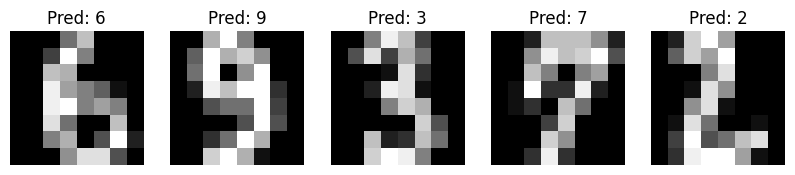

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load MNIST digit dataset
digits = datasets.load_digits()
X = digits.images.reshape(len(digits.images), -1)  # Flatten images
y = digits.target  # Digits 0-9

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display some test images with predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()
